# Naitra Sheth 
# Student ID - 200542440
# Problem Set - 3

# Question 1:

### Step 1. Import the necessary libraries

In [4]:
import pandas as pd

### Step 2. Import the dataset from this address.

In [5]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|', index_col='user_id')

### Step 3. Assign it to a variable called users

In [6]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Step 4. Discover what is the mean age per occupation

In [7]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [8]:
# create a function to convert gender to numeric values
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)

# create a new dataframe with the total number of M and F per occupation
gender_occ = users.groupby(['occupation', 'gender_n']).gender.count()

# create a new dataframe with the total number of M per occupation
total_occ = users.groupby('occupation').gender.count()

# calculate the Male ratio per occupation
male_ratio = gender_occ.loc[:,1] / total_occ * 100

# sort the values from the most to the least
male_ratio.sort_values(ascending=False, inplace=True)
male_ratio

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

### Step 6. For each occupation, calculate the minimum and maximum ages

In [9]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7. For each combination of occupation and sex, calculate the mean age

In [10]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8. For each occupation present the percentage of women and men

In [11]:
# create a new dataframe with the total number of M and F per occupation
gender_occ = users.groupby(['occupation', 'gender']).gender.count()

# create a new dataframe with the total number of M and F
total_gender = users.groupby('gender').gender.count()

# calculate the percentage of women and men per occupation
occup_gender = gender_occ / total_gender * 100

# present the percentage of women and men per occupation
occup_gender.unstack().round(2)

gender,F,M
occupation,,
administrator,13.19,6.42
artist,4.76,2.24
doctor,NaN,1.04
educator,9.52,10.30
engineer,0.73,9.70
entertainment,0.73,2.39
executive,1.10,4.33
healthcare,4.03,0.75
homemaker,2.20,0.15


# Question 2

### Step 1. Import the necessary libraries

In [12]:
import pandas as pd

### Step 2. Import the dataset from this address

In [16]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

### Step 3. Assign it to a variable called euro12

In [17]:
euro12 = pd.read_csv(url)

### Step 4. Select only the Goal column

In [18]:
goals = euro12['Goals']

### Step 5. How many teams participated in the Euro2012?

In [19]:
num_teams = euro12['Team'].count()
print('The number of teams that participated in the Euro2012 is:', num_teams)

The number of teams that participated in the Euro2012 is: 16


### Step 6. What is the number of columns in the dataset?

In [20]:
num_columns = euro12.shape[1]
print('The number of columns in the dataset is:', num_columns)

The number of columns in the dataset is: 35


### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [21]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [22]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [23]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print('The mean Yellow Cards given per team is:', mean_yellow_cards)

The mean Yellow Cards given per team is: 7.4375


### Step 10. Filter teams that scored more than 6 goals

In [24]:
high_goals = euro12[euro12['Goals'] > 6]
high_goals[['Team', 'Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


### Step 11. Select the teams that start with G

In [25]:
g_teams = euro12[euro12['Team'].str.startswith('G')]
g_teams['Team']

5    Germany
6     Greece
Name: Team, dtype: object

### Step 12. Select the first 7 columns

In [26]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3

In [27]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [28]:
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3:

### Step 1. Import the necessary libraries

In [29]:
import pandas as pd
import numpy as np

### Step 2. Create 3 different Series, each of length 100, as follows:

In [30]:
# Create the first series
series1 = pd.Series(np.random.randint(1, 5, size=100))

# Create the second series
series2 = pd.Series(np.random.randint(1, 4, size=100))

# Create the third series
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

### Step 3. Create a DataFrame by joining the Series by column

In [31]:
# Combine the three series to create a DataFrame
df = pd.concat([series1, series2, series3], axis=1)

### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [32]:
# Rename the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [33]:
# Combine the three series into a single series
bigseries = pd.concat([series1, series2, series3], axis=0)

# Convert the series into a DataFrame with a single column
bigcolumn = pd.DataFrame(bigseries)

# Reset the index
bigcolumn.reset_index(drop=True, inplace=True)

### Step 6. Check if it is going only until index 99

In [34]:
# Check the last index
print(bigcolumn.index.max())

299


### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [35]:
# Reindex the DataFrame
df_reindexed = df.reindex(range(300))

# View the first 10 rows of the reindexed DataFrame
print(df_reindexed.head(10))

   bedrs  bathrs  price_sqr_meter
0    3.0     1.0          25765.0
1    3.0     1.0          11120.0
2    1.0     1.0          27228.0
3    1.0     1.0          23074.0
4    2.0     3.0          27392.0
5    3.0     3.0          14064.0
6    3.0     2.0          12735.0
7    2.0     3.0          12565.0
8    1.0     1.0          22447.0
9    3.0     1.0          14285.0


# Question 4:

### Step 1. Import the necessary libraries

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime

### Step 2. Import the dataset from the attached file wind.txt

In [54]:
filename = 'wind.txt'
data=pd.read_csv('wind.txt',sep="\s+",parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [55]:
data.columns = ['date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR',
                'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [59]:
def fix_year(date):
    year = date.year - 100 if date.year > 1989 else date.year
    return datetime.datetime(year, date.month, date.day)

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

### The index has already been set in Step 3.

### Step 6: Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.

In [60]:
print("Number of missing values for each location:")
print(data.isnull().sum())

Number of missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


### Step 7: Compute how many non-missing values there are in total.

In [61]:
print("Total number of non-missing values:")
print(data.notnull().sum().sum())

Total number of non-missing values:
78857


### Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [62]:
print("Mean windspeed over all locations and times:")
print(data.mean().mean())

Mean windspeed over all locations and times:
10.227982360836924


### Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

In [63]:
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

print("Statistics for each location:")
print(loc_stats)

Statistics for each location:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


### Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [64]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

print("Statistics for each day:")
print(day_stats)

Statistics for each day:
             min    max       mean       std
date                                        
2061-01-01  9.29  18.50  13.018182  2.808875
2061-01-02  6.50  17.54  11.336364  3.188994
2061-01-03  6.17  18.50  11.641818  3.681912
2061-01-04  1.79  11.75   6.619167  3.198126
2061-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


### Step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [65]:
january_data = data[data.index.month == 1]
january_means = january_data.mean()
print("Average windspeed in January for each location:")
print(january_means)

Average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


### Step 12: Downsample the record to a yearly frequency for each location.

In [66]:
yearly_data = data.resample('AS').mean()
print("Yearly windspeed data for each location:")
print(yearly_data)

Yearly windspeed data for each location:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1973-01-01  11.828466  10.680493  10.680493  5.547863   9.640877  6.548740   
1974-01-01  13.643096  11.811781  12.336356  6.427041  11.110986  6.809781   
1975-01-01  12.008575  10.293836  11.564712  5.269096   9.190082  5.668521   
1976-01-01  11.737842  10.203115  10.761230  5.109426   8.846339  6.311038   
1977-01-01  13.099616  11.144493  12.627836  6.073945  10.003836  8.586438   
...               ...        ...        ...       ...        ...       ...   
2068-01-01  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
2069-01-01  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
2070-01-01  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
2071-01-01  11.273123   9.095178  11.088329  5.241507   9.440329  6.097151   
2072-01-01  12.463962  

### Step 13: Downsample the record to a monthly frequency for each location.

In [67]:
monthly_data = data.resample('MS').mean()
print("Monthly windspeed data for each location:")
print(monthly_data)

Monthly windspeed data for each location:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1973-01-01  13.177742  12.202903  10.860968  5.454516   9.327419  7.419677   
1973-02-01  14.411071  13.129643  10.126786  6.708929  12.078214  7.673929   
1973-03-01  11.840645  11.706452  10.771290  5.574516   9.494516  6.273871   
1973-04-01  13.827667  11.922667  13.310333  7.525333  10.236000  8.213000   
1973-05-01  12.786129  11.152258  11.188387  6.472258  10.801290  8.265484   
...               ...        ...        ...       ...        ...       ...   
2072-08-01   9.822581   6.824194   9.757097  4.443871   6.490323  4.565484   
2072-09-01   9.247333   7.534000  10.230667  3.791667   5.322333  3.580333   
2072-10-01  11.489677   9.816774  11.952903  5.230968   7.185484  5.014516   
2072-11-01  12.247333  12.351667  11.569333  5.364000   7.687000  5.761667   
2072-12-01  15.641290 

### Step 14: Downsample the record to a weekly frequency for each location.

In [72]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1973-01-07,10.232857,9.808571,9.625714,3.778571,5.477143,4.868571,7.250000,4.597143,5.851429,4.314286,6.872857,7.470000
1973-01-14,15.321429,12.945714,12.935714,6.167143,10.128571,8.452857,9.434286,7.768571,8.004286,7.295714,10.671429,13.350000
1973-01-21,13.108571,11.118571,11.511429,6.454286,10.124286,7.864286,13.940000,7.905714,10.052857,9.957143,13.774286,21.265714
1973-01-28,13.880000,13.828571,10.168571,5.308571,11.178571,8.381429,11.878571,10.457143,10.207143,8.052857,15.477143,16.310000
1973-02-04,12.870000,12.214286,8.381429,5.204286,8.902857,6.342857,9.091429,7.900000,8.191429,7.992857,13.681429,13.415714
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-12-04,15.422857,17.060000,12.874286,7.344286,11.495714,9.650000,14.695714,10.345714,10.357143,9.695714,16.191429,19.784286
2072-12-11,16.608571,16.554286,13.665714,6.861429,12.411429,10.328571,14.790000,10.678571,10.214286,10.210000,17.547143,19.607143
2072-12-18,17.917143,19.572857,16.711429,10.804286,14.940000,12.778571,15.614286,14.367143,12.125714,11.751429,20.471429,23.408571


### Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [73]:
weekly_data = data.resample('W', closed='left', label='left').mean().iloc[1:53]
weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(weekly_stats)

                  min        max       mean       std
date                                                 
1973-01-07   5.191429  13.904286   9.023095  2.693891
1973-01-14   7.375714  20.247143  12.187738  3.473181
1973-01-21   5.005714  17.631429  11.172262  3.471806
1973-01-28   5.281429  13.418571   9.375119  2.672038
1973-02-04   7.625714  21.701429  12.839643  3.810563
1973-02-11   8.578571  19.824286  13.920476  4.139212
1973-02-18   7.190000  22.737143  11.848452  4.070031
1973-02-25   4.614286  15.212857   9.709881  3.163930
1973-03-04   4.781429  15.134286   9.105714  3.060764
1973-03-11   1.570000   9.320000   4.847262  2.504132
1973-03-18   6.001429  15.018571   9.767857  2.859875
1973-03-25   8.535714  22.000000  13.496071  3.647353
1973-04-01  10.035714  23.790000  15.450000  3.636249
1973-04-08   7.182857  14.668571  10.095238  2.472432
1973-04-15   7.042857  16.392857  10.296905  2.484129
1973-04-22   6.012857  15.545714   9.663810  2.821107
1973-04-29   6.334286  14.96

# Question 5 :

### Step 1. Import the necessary libraries

In [74]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this address.

In [75]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

### Step 3. Assign it to a variable called chipo.

In [76]:
chipo = pd.read_csv(url, delimiter='\t')

### Step 4. See the first 10 entries

In [77]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [78]:
chipo.shape[0]

4622

### Step 6. What is the number of columns in the dataset?

In [79]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [80]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [81]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

In [82]:
most_ordered = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [83]:
most_ordered.iloc[0]['quantity']

761

### Step 11. What was the most ordered item in the choice_description column?

In [84]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were ordered in total?

In [85]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [86]:
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

# Check the item price type
chipo['item_price'].dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [87]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)

39237.02

### Step 15. How many orders were made in the period?

In [88]:
orders = chipo['order_id'].nunique()
orders

1834

### Step 16. What is the average revenue amount per order?

In [90]:
# calculate total revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

# calculate average revenue per order
num_orders = chipo['order_id'].nunique()
avg_revenue_per_order = total_revenue / num_orders

print('Average revenue amount per order: $', round(avg_revenue_per_order, 2))


Average revenue amount per order: $ 21.39


# Question 6:

### Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.

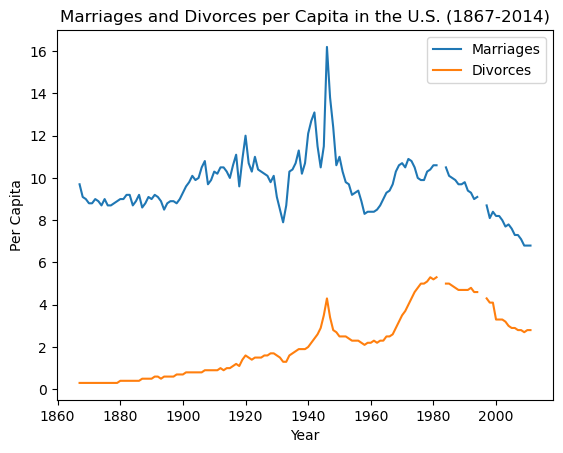

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# create a line plot
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces')

# set the labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# show the plot
plt.show()

# Question 7:

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

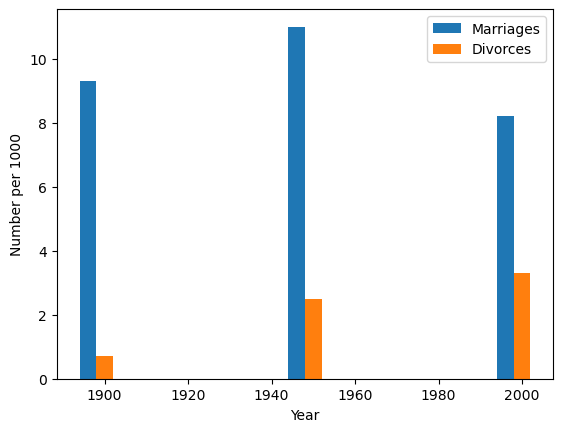

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read in the data from CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')


# Step 2: Create a vertical bar chart comparing the number of marriages and divorces per capita in 1900, 1950, and 2000
subset = data[data['Year'].isin([1900, 1950, 2000])]
plt.bar(subset['Year']-4, subset['Marriages_per_1000'], width=4, label='Marriages')
plt.bar(subset['Year'], subset['Divorces_per_1000'], width=4, label='Divorces')

# Step 3: Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.legend()

# Step 4: Show the plot
plt.show()


# Question 8:

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

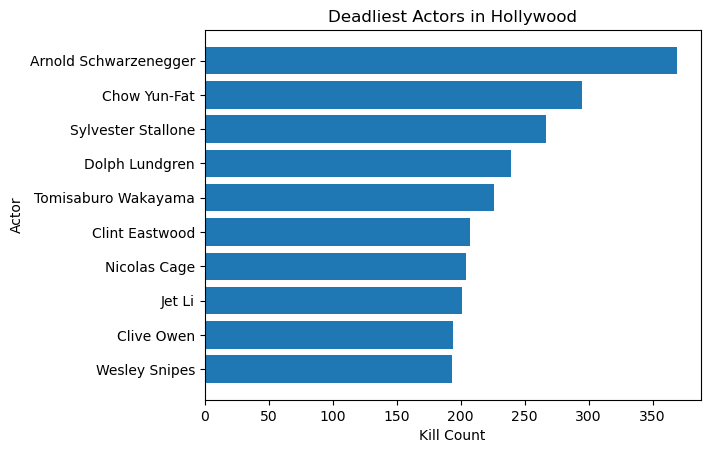

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('actor_kill_counts.csv')

# Sort the data by kill count
data = data.sort_values('Count')

# Create a horizontal bar chart
plt.barh(data['Actor'], data['Count'])

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Show the plot
plt.show()

# Question 9:

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

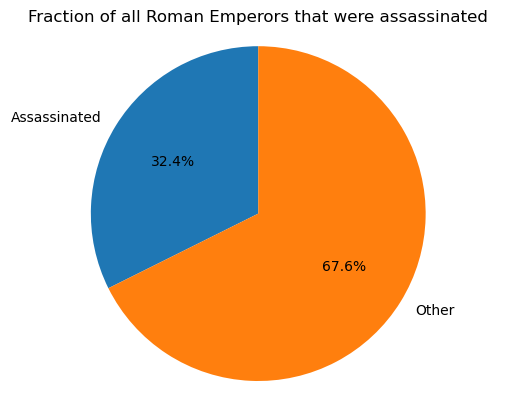

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas dataframe
data = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of emperors that were assassinated
assassinated = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Count the number of emperors that died of other causes
other = data[data['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# Create a pie chart
labels = ['Assassinated', 'Other']
sizes = [assassinated, other]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Make the pie chart an even circle
plt.axis('equal')

# Add a title
plt.title('Fraction of all Roman Emperors that were assassinated')

# Show the chart
plt.show()

# Question 10 :

### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

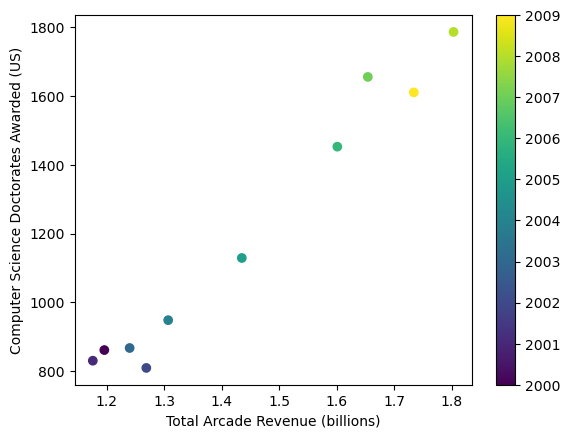

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create a scatter plot with revenue on the x-axis, number of CS PhDs on the y-axis, and colored by year
plt.scatter(data["Total Arcade Revenue (billions)"], data["Computer Science Doctorates Awarded (US)"], c=data["Year"])

# Add labels for the x-axis and y-axis
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")

# Add a colorbar to show the year values
plt.colorbar()

# Display the plot
plt.show()